In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
data = pd.read_csv('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/data/Nifty_50_monthly.csv')
stock_names = data.columns[1:]
data

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-01-01,83.153633,134.706543,439.091125,259.076141,251.916626,1036.131714,63.653694,45.593979,60.885281,...,240.419800,222.953842,446.352051,92.316086,245.710632,47.525696,139.034042,172.213837,1034.288086,159.698929
1,2011-02-01,72.534309,129.505905,461.017334,224.228287,228.892075,874.448853,50.706177,40.127350,53.555435,...,220.991791,198.155762,444.054169,81.387192,200.754272,42.645218,123.912498,168.026260,947.186096,142.583527
2,2011-03-01,79.167389,129.508926,433.762726,228.274963,237.392761,937.185181,55.791252,42.826740,53.910622,...,230.473648,204.149445,434.151184,75.343185,214.425201,42.827469,132.059372,158.922440,908.912781,147.265991
3,2011-04-01,84.723770,131.559448,450.077759,227.170944,259.302917,1023.816101,63.170483,50.760136,55.898777,...,231.683350,203.737625,455.636627,83.332863,233.194565,42.297569,135.497879,180.222336,1056.681641,158.092194
4,2011-05-01,80.622169,134.076019,441.731628,247.228867,235.117905,1010.903870,62.429844,50.556591,58.435856,...,229.395950,212.888214,447.258636,82.794693,230.105453,41.490898,134.276825,183.001617,1011.799500,148.644196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2023-08-01,2481.100098,765.349976,5018.615723,3337.124512,959.900024,4923.950195,7269.700195,1572.349976,356.493958,...,601.758667,1136.968750,3402.530029,850.810730,643.650024,123.199997,1131.303711,3001.899902,8281.799805,406.083984
152,2023-09-01,2450.050049,799.500000,4835.987793,3253.869873,991.150024,4668.450195,7320.600098,1514.500000,328.672180,...,560.156372,1102.713989,3330.724854,838.298096,611.200012,127.050003,1214.952026,3116.800049,8262.400391,415.463959
153,2023-10-01,2387.250000,831.400024,5114.336426,3161.331543,1041.050049,5016.450195,7967.600098,1561.050049,325.950745,...,593.005493,1134.979980,3463.443359,865.855713,620.450012,128.000000,1203.228271,3196.250000,8304.900391,404.587158
154,2023-11-01,2217.300049,769.099976,4792.226562,2929.436279,971.799988,5344.350098,7471.899902,1572.849976,340.799225,...,557.058350,1109.873169,3291.365479,896.889099,627.700012,116.599998,1113.099976,3173.399902,8381.450195,380.139313


In [46]:
#Parameters


#MACD parameters
n = 9
m = 19
t = 6

#RSI parameters
period = 14

## Strat-1 MACD + RSI

In [47]:
def MACD(price_data, short_window, long_window, signal_window, column_name):
    data = price_data
   
    data.loc[:,'EMAn'] = data[column_name].ewm(span=short_window, adjust=False).mean()
    data.loc[:,'EMAm'] = data[column_name].ewm(span=long_window, adjust=False).mean()

    for i in range(short_window):
        data.loc[i,'EMAn'] = None
    for i in range(long_window):
        data.loc[i,'EMAm'] = None
    
    data['MACD'] = data['EMAn'] - data['EMAm']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    trade_sig=np.zeros([len(data),1],dtype=float)

    for i in range(long_window+1,len(data)):
        if data.loc[i,'MACD'] > data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] < data.loc[i-1,'Signal Line']:
            trade_sig[i] = 1
        if data.loc[i,'MACD'] < data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] > data.loc[i-1,'Signal Line']:
            trade_sig[i] = -1
        
    trade_sig=trade_sig.reshape(len(trade_sig),1)

    data_numpy=data['Date'].to_numpy()
    data_numpy=data_numpy.reshape(len(data_numpy),1)
    data_numpy=np.column_stack((data_numpy,data[column_name].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAn'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAm'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['MACD'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['Signal Line'].to_numpy()))

    final=np.column_stack((data_numpy,trade_sig))
    final_df=pd.DataFrame(final,columns=['Date','Close','EMAn','EMAm','MACD','Signal Line','Trade Signal'],index=data.index)

    final_df.drop(["EMAn","EMAm","MACD","Signal Line"],axis=1,inplace=True)
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    final_df['Close'] = final_df['Close'].astype(float) 
    final_df['Trade Signal'] = final_df['Trade Signal'].astype(int)

    return final_df


master_macd = pd.DataFrame()

for name in stock_names:
    temp = MACD(data, n, m, t, name)
    temp = temp[['Date','Trade Signal']]
    temp.columns = ['Date',name]
    temp.set_index('Date', inplace=True)
    master_macd = pd.concat([master_macd, temp], axis=1)

In [48]:
master_macd.insert(0, 'Date', master_macd.index)
master_macd.reset_index(drop=True, inplace=True)
master_macd = master_macd[period:]
master_macd = master_macd.reset_index(drop=True)
#master_macd = master_macd[232:725]
master_macd

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2012-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-04-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-05-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-06-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-07-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2023-08-01,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,0,0,0,1
138,2023-09-01,0,1,0,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
139,2023-10-01,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
140,2023-11-01,0,0,-1,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
def calculate_rsi(prices, period):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def generate_signals(rsi_values):
    signals = np.zeros(rsi_values.shape)
    for rsi in rsi_values:
        if rsi < 30:
            signals[rsi_values == rsi] = 1
        elif rsi > 70:
            signals[rsi_values == rsi] = -1
    return signals

rsi_values = pd.DataFrame()
rsi_values['Date'] = data['Date']
for stock in stock_names:
    rsi_values[stock] = calculate_rsi(data[stock], period)

master_rsi = rsi_values[period:]

In [50]:
#master_rsi = master_rsi[232:725]
master_rsi = master_rsi.reset_index(drop=True)
master_rsi

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2012-03-01,34.663607,51.342524,63.599667,56.852864,47.430925,62.823867,59.561170,67.451635,55.248569,...,44.532612,63.381750,60.550423,64.235354,61.119438,38.901565,42.138460,62.338788,75.858585,49.481090
1,2012-04-01,31.482698,43.859475,68.700541,59.422362,47.520340,56.503334,64.011184,67.249271,58.274290,...,41.957077,66.969386,56.942047,58.060435,62.983772,40.083943,55.185282,65.848589,78.697301,53.961259
2,2012-05-01,30.028050,42.532014,67.437427,64.738418,45.270500,53.435838,67.453897,73.911781,54.151532,...,42.371468,70.146529,63.658310,60.124475,67.783931,39.180717,52.599884,66.007549,70.444514,44.806480
3,2012-06-01,28.113385,42.252577,70.340197,68.833096,39.809290,49.178833,62.261765,62.675510,58.108975,...,40.093477,62.465280,57.969110,50.887137,48.310950,33.871314,48.970077,56.395918,72.324980,44.289787
4,2012-07-01,27.875035,41.997886,63.834140,71.322918,44.042202,51.805428,66.253126,64.204900,63.008563,...,46.522109,70.687515,61.683272,57.239150,50.859068,40.528150,56.082704,57.599364,74.294801,45.054339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2023-08-01,55.044506,54.928375,62.752347,60.611348,64.359884,72.378646,59.326871,56.431251,57.003843,...,66.394048,72.211076,58.487993,63.691353,72.263516,60.946583,54.842287,67.827436,65.182679,47.260706
138,2023-09-01,54.589267,56.789455,59.520162,58.148127,66.315108,66.018585,59.720733,54.161859,50.005136,...,59.286974,68.172553,56.216606,62.028397,67.645483,62.343237,58.799098,69.749717,64.907885,48.731128
139,2023-10-01,53.623300,58.512756,62.675641,55.450673,69.218970,69.898419,64.435167,55.705483,49.366659,...,62.683635,69.881248,59.358251,64.242727,68.267994,62.697733,58.031609,71.038302,65.253483,47.091540
140,2023-11-01,50.993542,53.984581,57.126058,49.281118,61.318766,73.023776,58.760588,56.108974,52.900262,...,57.072261,66.872794,53.952710,66.604528,68.775095,55.897448,52.372078,70.113257,65.904802,43.545106


In [51]:
prices = pd.read_csv('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/data/Nifty_50_monthly.csv')
prices = prices[period:]
prices = prices.reset_index(drop=True)
prices

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2012-03-01,47.456532,137.573227,549.450989,286.860901,214.776230,1281.127686,71.013489,61.910526,62.056656,...,191.493057,253.606613,477.968262,104.154602,255.928055,31.875605,117.143425,214.990906,1354.889282,143.137146
1,2012-04-01,39.865295,121.319275,589.651245,297.220978,215.130188,1195.199463,76.656906,61.789082,64.741058,...,183.867844,264.228363,468.033325,97.399536,265.123108,32.492043,140.719421,228.096069,1429.621582,149.302628
2,2012-05-01,36.144112,118.087219,584.661865,321.574951,205.526825,1149.671997,81.694191,71.388519,61.934216,...,184.748184,274.942139,496.642700,100.777069,291.654572,31.810171,135.947281,228.706696,1360.483398,136.112503
3,2012-06-01,31.050920,117.431427,609.323608,344.253143,179.688110,1082.265015,77.616608,63.533115,65.414513,...,178.242645,262.223785,479.927795,89.209038,215.077286,27.405582,128.936325,207.945114,1402.081177,135.270279
4,2012-07-01,30.416700,116.869347,583.141174,359.998016,194.733078,1125.084717,83.434517,65.583191,70.373581,...,191.749817,292.476044,496.762115,99.594940,227.911987,30.783926,144.215088,211.702850,1448.603760,136.213959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2023-08-01,2481.100098,765.349976,5018.615723,3337.124512,959.900024,4923.950195,7269.700195,1572.349976,356.493958,...,601.758667,1136.968750,3402.530029,850.810730,643.650024,123.199997,1131.303711,3001.899902,8281.799805,406.083984
138,2023-09-01,2450.050049,799.500000,4835.987793,3253.869873,991.150024,4668.450195,7320.600098,1514.500000,328.672180,...,560.156372,1102.713989,3330.724854,838.298096,611.200012,127.050003,1214.952026,3116.800049,8262.400391,415.463959
139,2023-10-01,2387.250000,831.400024,5114.336426,3161.331543,1041.050049,5016.450195,7967.600098,1561.050049,325.950745,...,593.005493,1134.979980,3463.443359,865.855713,620.450012,128.000000,1203.228271,3196.250000,8304.900391,404.587158
140,2023-11-01,2217.300049,769.099976,4792.226562,2929.436279,971.799988,5344.350098,7471.899902,1572.849976,340.799225,...,557.058350,1109.873169,3291.365479,896.889099,627.700012,116.599998,1113.099976,3173.399902,8381.450195,380.139313


In [52]:
def get_returns(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_macd.iloc[i,j]==1):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_macd.iloc[i,j]==-1):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns

    

In [53]:
returns = get_returns(master_macd, master_rsi, prices)

In [54]:
returns

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 28.51824455046725,
 2.5979950117284494,
 -3.5600505784553267,
 11.134600769506983,
 -31.8326679644411,
 0,
 0,
 -26.19463654519799,
 -20.075481583697055,
 0,
 51.50952895738811,
 -8.496572992014178,
 0,
 0,
 12.580084550439041,
 -3.1979328351302563,
 49.90085725539437,
 -1.2382160165589653,
 -10.348781029309556,
 26.078717511744053,
 -139.51432304641747,
 1.2970061931815016,
 0,
 4.99223010204344,
 0,
 0,
 0,
 0,
 20.594624999712444,
 0,
 4.934532380412831,
 0,
 0,
 -112.5321852173874,
 6.161097171791113,
 0,
 -17.023949005339773,
 0,
 11.945956981353213,
 -97.73072875387575,
 419.87248674115455,
 33.9570365281097,
 20.535379568271225,
 0,
 0,
 22.862263325013746,
 0,
 1.1763086765213608,
 143.1313732759339,
 73.849833431294,
 0,
 244.65852719041277,
 -2.7751260642443114,
 -62.70919997043076,
 0,
 13.159892395527724,
 -3.5919728409401204,
 -33.34886967275846,
 0,
 0,
 4.865113643979865,
 -16.58636117318951,
 160.0196179737564,
 -219.22324013000883,
 20.

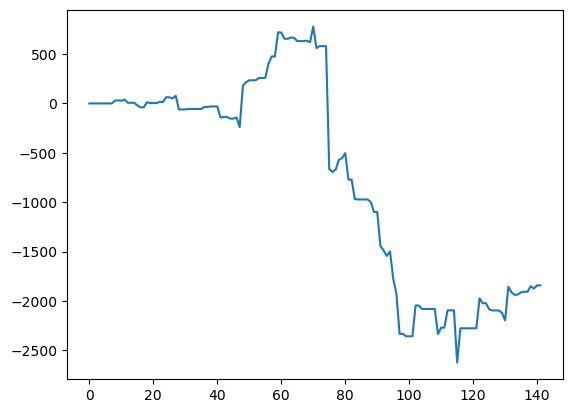

In [55]:
cumulative_returns = np.cumsum(returns)
plt.plot(cumulative_returns)
plt.show()